In [71]:
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings 
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("./4.4k dropout and student academic success .csv", delimiter=';')

In [4]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
df["Target"] = df ["Target"].map({'Dropout' : 0,
                                'Enrolled' : 1,
                                'Graduate': 2,
                                  })

In [11]:
df["Target"]

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [12]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [13]:
print("Number of graduates(2):", (df['Target']==2).sum())
print("Number of dropouts(0):", (df['Target']==0).sum())

Number of graduates(2): 2209
Number of dropouts(0): 1421


In [14]:
df['Target'] = df['Target'].apply(lambda x: 1  if x==2 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [15]:
print("Number of graduates(1):", (df['Target']==1).sum())
print("Number of dropouts(0):", (df['Target']==0).sum())

Number of graduates(1): 2209
Number of dropouts(0): 1421


In [16]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [17]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [18]:
df['Target'].info

<bound method Series.info of 0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64>

In [19]:
# plt.figure(figsize=(10, 8))  # Increase figure size

# # sns.set(font_scale=0.19)
# sns.heatmap(df.corr(),annot=True)
# plt.tight_layout()


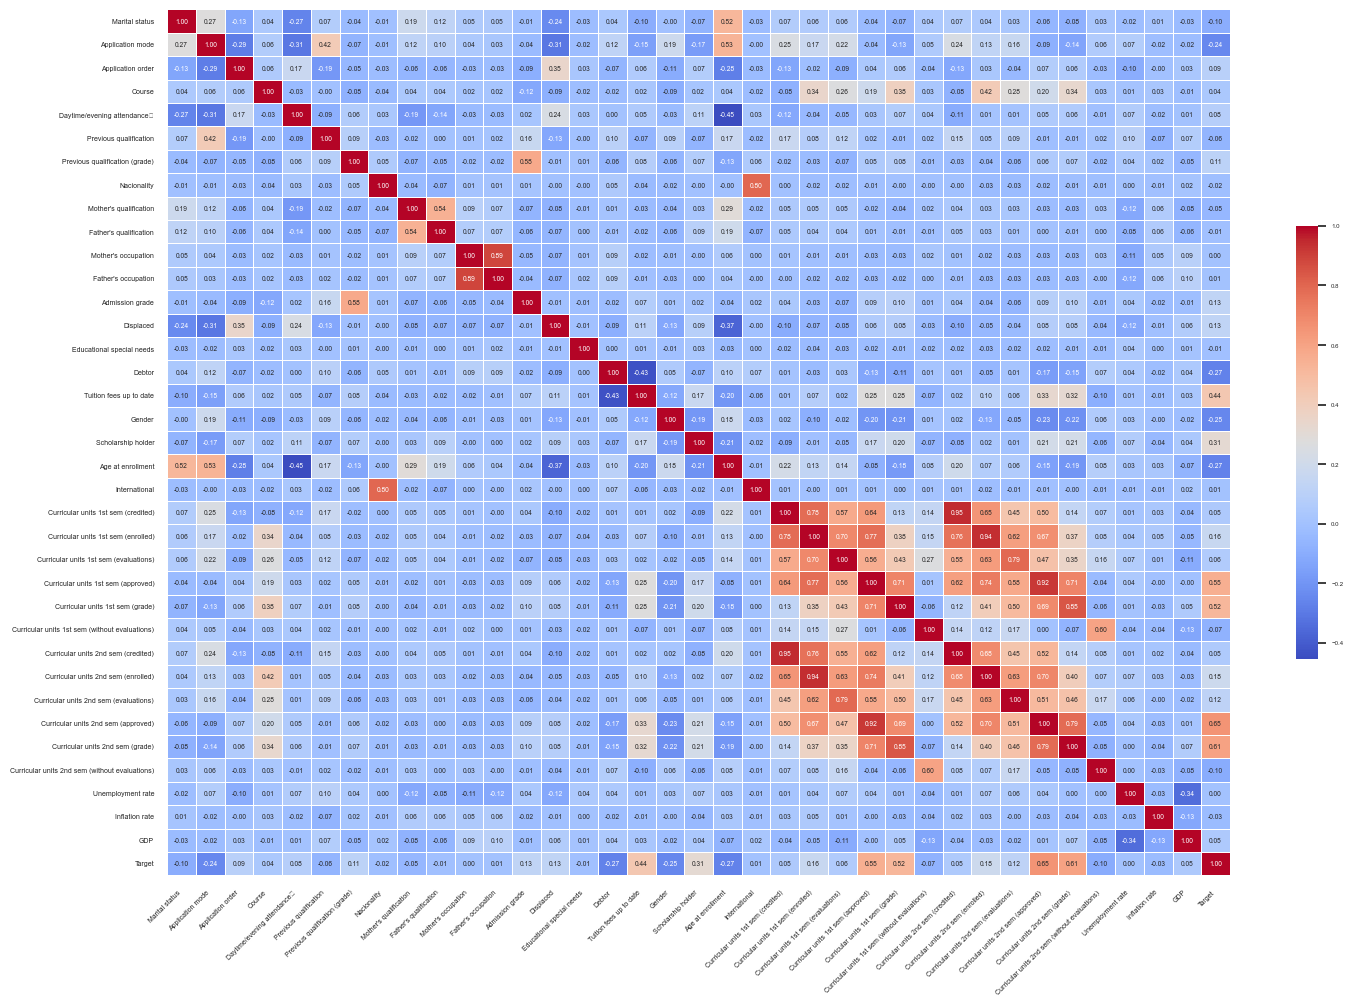

In [20]:
plt.figure(figsize=(15, 10))  # Increase figure size
sns.set(font_scale=.4)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right', fontsize=5)  # Adjust x-axis labels
plt.yticks(fontsize=5)  # Adjust y-axis labels
plt.tight_layout()

plt.savefig('heatmap.png', dpi=1200)  
plt.show()

In [21]:
corr = df.corr()['Target']

In [22]:
# features = corr[abs(corr) > 0.1].index.tolist()

# if 'Target' not in features:
#     features.append('Target')
    

# df = df[features]

In [23]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [24]:
# Plot the above values
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

plot_df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(plot_df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

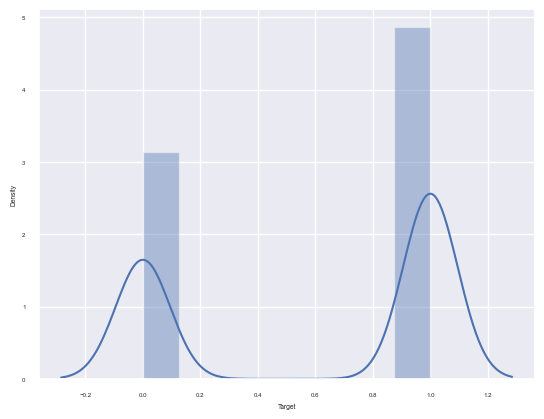

In [25]:
sns.distplot(df["Target"])
sns.set(font_scale=0.5)

In [26]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [27]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [28]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [29]:
fig = px.box(df, y='Age at enrollment')
fig.show()

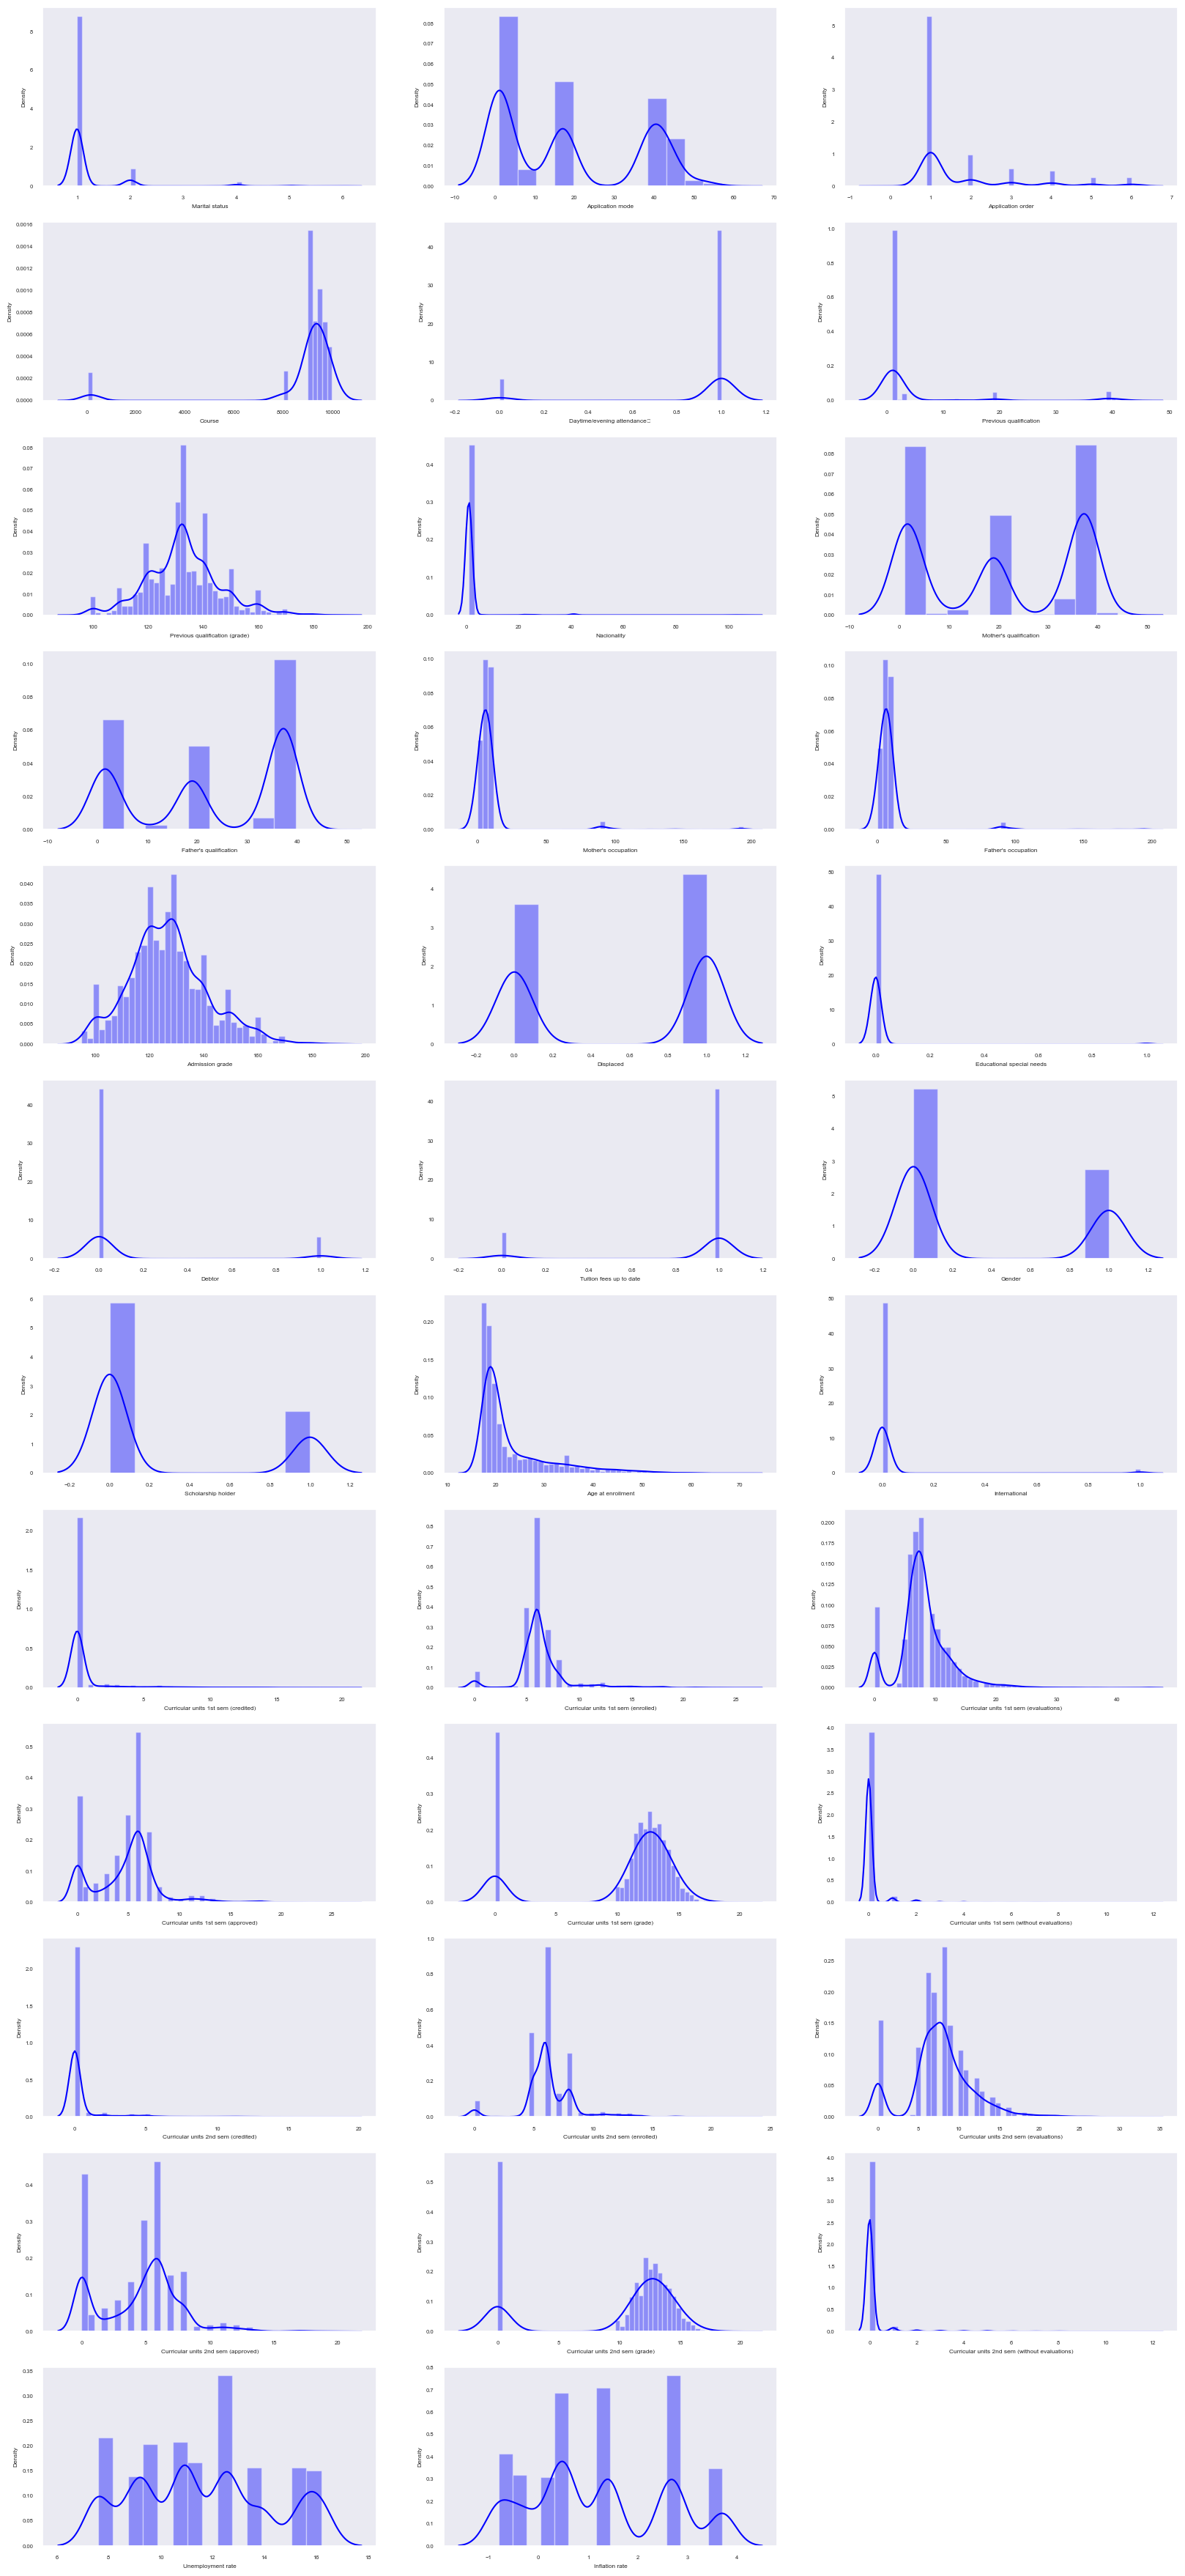

In [30]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

In [31]:
px.histogram(df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['red'])

<function matplotlib.pyplot.show(close=None, block=None)>

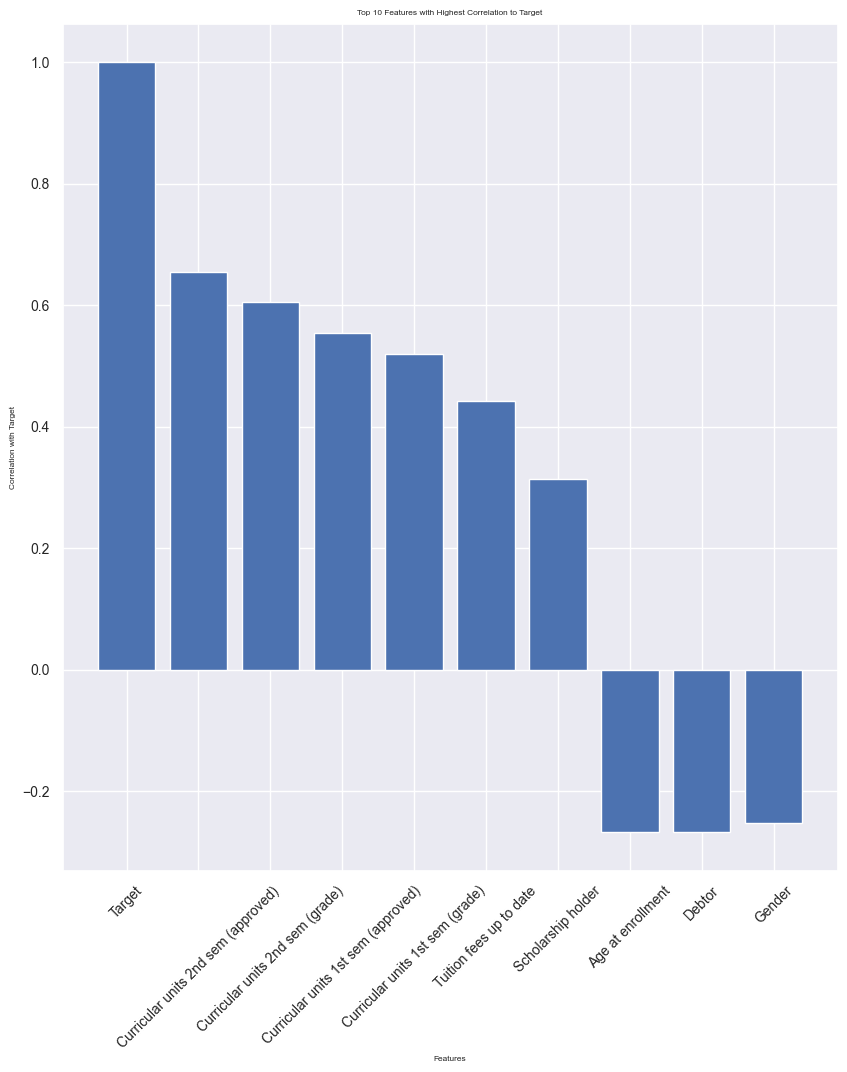

In [32]:
top_10_features = corr.abs().nlargest(10).index 
top_10_corr_values = corr[top_10_features]

plt.figure(figsize=(10,11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')

plt.ylabel('Correlation with Target')
plt.title("Top 10 Features with Highest Correlation to Target")
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show

<Axes: ylabel='Density'>

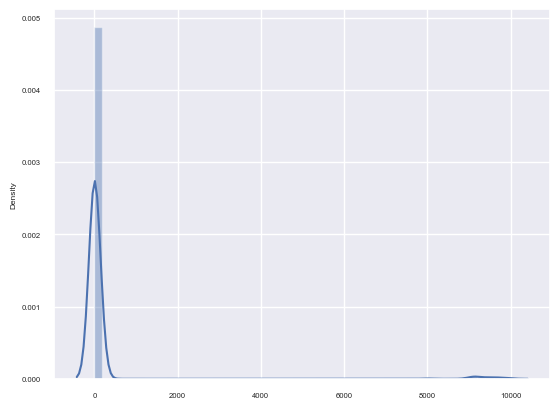

In [33]:
sns.distplot(df)

In [34]:
X = df.drop('Target', axis=1)
y = df['Target']

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns)

In [36]:
X.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,...,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03
mean,9.395606e-17,7.046705e-17,3.131869e-17,-2.896979e-16,1.722528e-16,-2.348902e-17,9.405394e-16,1.761676e-17,5.089287e-17,-7.046705e-17,...,1.076580e-17,4.697803e-17,-1.663805e-17,-1.957418e-17,-1.213599e-16,3.542927e-16,-3.229740e-17,1.174451e-17,-8.808381e-18,-4.208449e-17
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,...,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-3.006856e-01,-1.003777e+00,-1.312294e+00,-4.264485e+00,-2.810171e+00,-3.524213e-01,-2.864841e+00,-1.242143e-01,-1.218383e+00,-1.412370e+00,...,-1.898710e-01,-2.876857e-01,-2.782691e+00,-1.958586e+00,-1.429014e+00,-1.831085e+00,-1.901484e-01,-1.511034e+00,-1.467154e+00,-1.792623e+00
25%,-3.006856e-01,-1.003777e+00,-5.624708e-01,1.116857e-01,3.558503e-01,-3.524213e-01,-5.983891e-01,-1.242143e-01,-1.154211e+00,-1.281423e+00,...,-1.898710e-01,-2.876857e-01,-5.729500e-01,-4.448173e-01,-7.964910e-01,8.788601e-02,-1.901484e-01,-8.361906e-01,-6.727696e-01,-7.482245e-01
50%,-3.006856e-01,-8.191671e-02,-5.624708e-01,1.933884e-01,3.558503e-01,-3.524213e-01,1.355292e-02,-1.242143e-01,-6.328805e-02,-2.338469e-01,...,-1.898710e-01,-2.876857e-01,-1.310017e-01,5.977232e-02,1.522934e-01,4.191176e-01,-1.901484e-01,-1.988382e-01,1.216146e-01,1.457096e-01
75%,-3.006856e-01,1.185642e+00,1.873525e-01,3.393896e-01,3.558503e-01,-3.524213e-01,5.348368e-01,-1.242143e-01,1.091807e+00,9.446766e-01,...,-1.898710e-01,-2.876857e-01,3.109465e-01,5.643619e-01,4.685549e-01,6.319747e-01,-1.901484e-01,8.509186e-01,9.882155e-01,7.962457e-01
max,7.856928e+00,2.222735e+00,3.186646e+00,5.496895e-01,3.558503e-01,3.838044e+00,4.312256e+00,1.607572e+01,1.541011e+00,1.402991e+00,...,1.748273e+01,9.107051e+00,7.382118e+00,6.367142e+00,4.896215e+00,1.557251e+00,1.586191e+01,1.713219e+00,1.782600e+00,1.557417e+00


In [37]:
X.shape

(3630, 36)

In [38]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.300686,-0.081917,2.436822,-4.197769,0.355850,-0.352421,-0.825034,-0.124214,-0.063288,-0.692162,...,-0.189871,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
1,-0.300686,-0.197149,-0.562471,0.193388,0.355850,-0.352421,2.045805,-0.124214,-1.218383,-1.281423,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.662383,-0.190148,0.850919,-1.106070,0.353704
2,-0.300686,-1.003777,2.436822,0.104434,0.355850,-0.352421,-0.825034,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
3,-0.300686,-0.081917,0.187353,0.444298,0.355850,-0.352421,-0.825034,-0.124214,1.155979,0.944677,...,-0.189871,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.190148,-0.836191,-1.467154,-1.376634
4,1.330837,1.185642,-0.562471,-0.406087,-2.810171,-0.352421,-2.487099,-0.124214,1.091807,1.010150,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.540750,-0.190148,0.850919,-1.106070,0.353704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.300686,-1.003777,3.186646,0.444298,0.355850,-0.352421,-0.598389,-0.124214,-1.218383,-1.412370,...,-0.189871,-0.287686,-0.131002,0.059772,0.152293,0.479934,-0.190148,1.450780,1.132649,-1.792623
3626,-0.300686,-1.003777,0.187353,0.444298,0.355850,-0.352421,-0.976131,15.475718,-1.218383,-1.412370,...,-0.189871,-0.287686,-0.131002,-0.444817,-0.796491,0.175852,-0.190148,-0.198838,-0.456119,0.898030
3627,-0.300686,-1.003777,-0.562471,0.312317,0.355850,-0.352421,1.592514,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,0.752895,0.312067,-1.112752,0.631975,-0.190148,0.850919,-1.106070,0.353704
3628,-0.300686,-1.003777,-0.562471,0.141659,0.355850,-0.352421,3.556773,-0.124214,1.091807,0.944677,...,-0.189871,-0.287686,-0.572950,-0.444817,0.152293,0.358301,-0.190148,-0.836191,-1.467154,-1.376634


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Without Tuning

In [40]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    sns.set(font_scale=1.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Precision :  0.849862258953168
Recall :  0.849862258953168
Accuracy :  0.849862258953168
F1 Score :  0.849862258953168
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       277
           1       0.85      0.92      0.88       449

    accuracy                           0.85       726
   macro avg       0.85      0.83      0.84       726
weighted avg       0.85      0.85      0.85       726

******************************************************



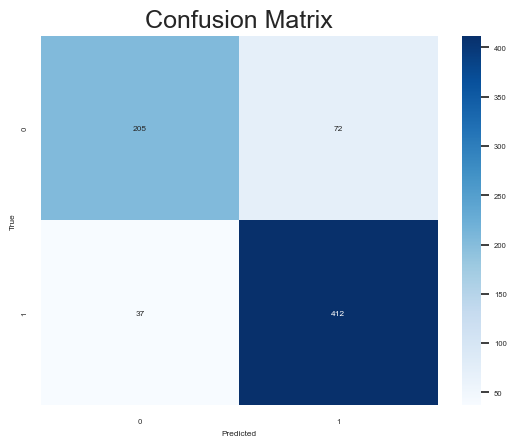

In [41]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
perform(y_pred_nb)

## Logistic Regression

Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



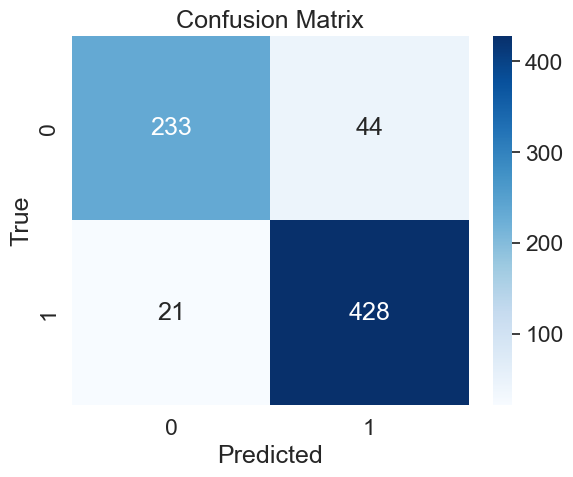

In [42]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
perform(lr_pred)


Precision :  0.8539944903581267
Recall :  0.8539944903581267
Accuracy :  0.8539944903581267
F1 Score :  0.8539944903581267
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       277
           1       0.88      0.88      0.88       449

    accuracy                           0.85       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.85      0.85      0.85       726

******************************************************



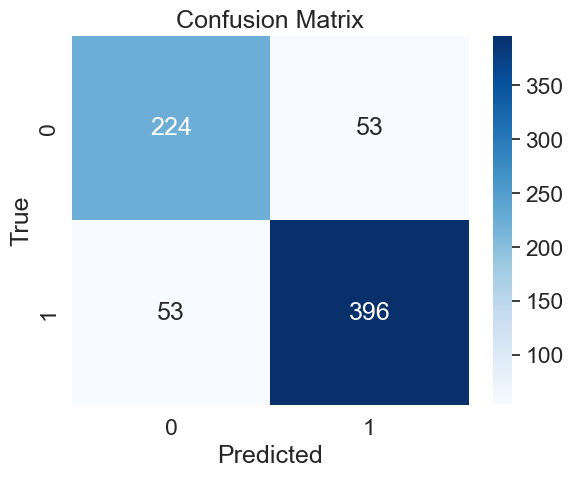

In [43]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)
perform(dt_pred)

Precision :  0.8663911845730028
Recall :  0.8663911845730028
Accuracy :  0.8663911845730028
F1 Score :  0.8663911845730029
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       277
           1       0.89      0.89      0.89       449

    accuracy                           0.87       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726

******************************************************



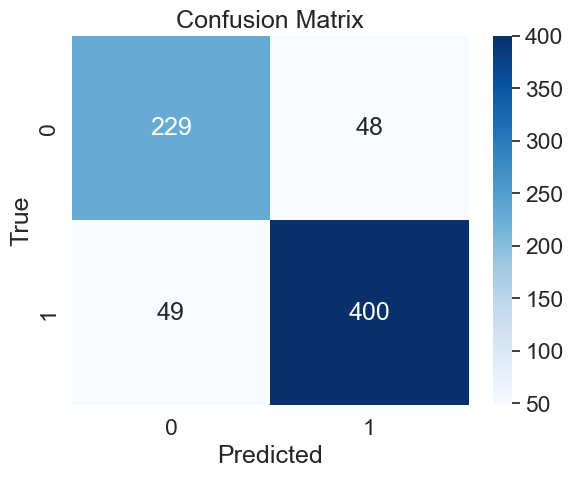

In [54]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10000, tol = 1e-3, loss='log_loss')
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
perform(sgd_pred)

Precision :  0.9035812672176309
Recall :  0.9035812672176309
Accuracy :  0.9035812672176309
F1 Score :  0.9035812672176309
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       277
           1       0.89      0.96      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.91      0.90      0.90       726

******************************************************



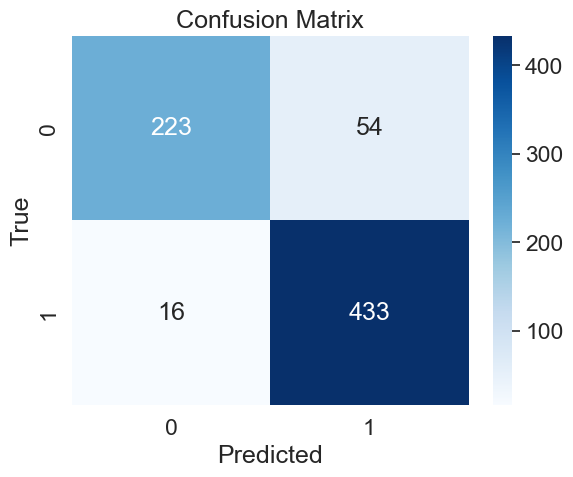

In [45]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)
svc_pred = svm.predict(X_test)
perform(svc_pred)

Precision :  0.9008264462809917
Recall :  0.9008264462809917
Accuracy :  0.9008264462809917
F1 Score :  0.9008264462809917
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.83      0.86       277
           1       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



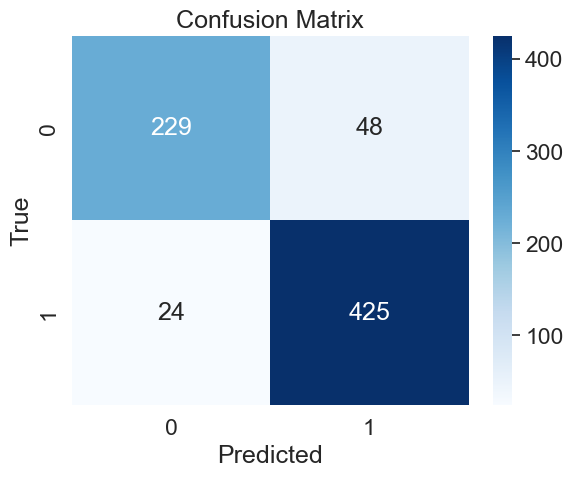

In [46]:
rfc = RandomForestClassifier(random_state=42, )
rfc.fit(X_train,y_train)
rf_pred = rfc.predict(X_test)
perform(rf_pred)

Precision :  0.8966942148760331
Recall :  0.8966942148760331
Accuracy :  0.8966942148760331
F1 Score :  0.8966942148760331
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



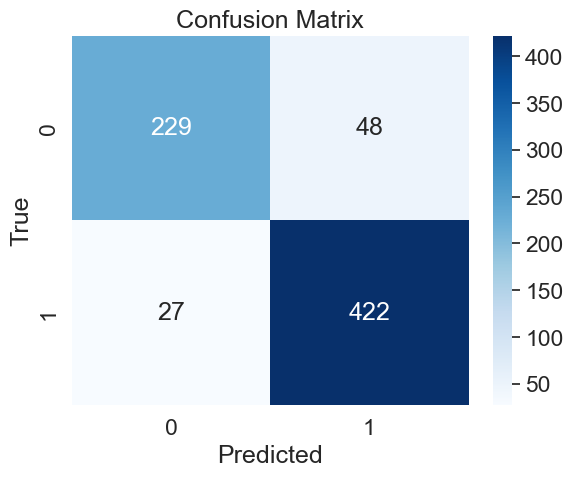

In [47]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)
perform(abc_pred)

Precision :  0.9077134986225895
Recall :  0.9077134986225895
Accuracy :  0.9077134986225895
F1 Score :  0.9077134986225895
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       277
           1       0.91      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



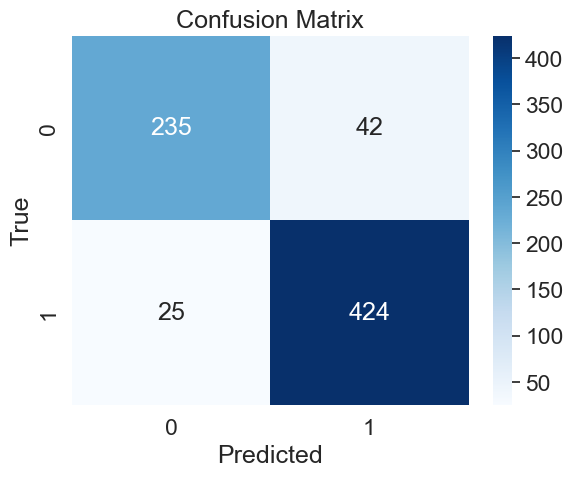

In [48]:
xbc = XGBClassifier(tree_method='hist', device = "cuda")
xbc.fit(X_train, y_train)
xbc_pred = xbc.predict(X_test)
perform(xbc_pred)

Precision :  0.9008264462809917
Recall :  0.9008264462809917
Accuracy :  0.9008264462809917
F1 Score :  0.9008264462809917
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       277
           1       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



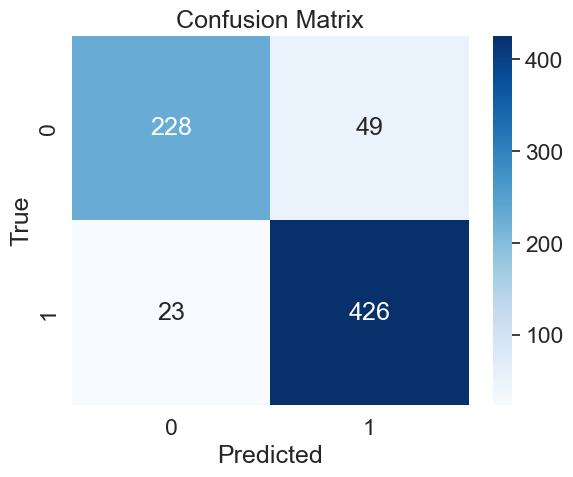

In [55]:
ens1 = VotingClassifier(estimators=[  ('dtree', dtree),
    ('model_nb', model_nb),
    ('lr', lr),
    ('sgd_clf', sgd_clf),
    ('svm', svm),
    ('rfc', rfc),
    ('abc', abc),
    ('xbc', xbc)], voting='soft')
ens1.fit(X_train, y_train)

ens1_pred = ens1.predict(X_test)
perform(ens1_pred)

Precision :  0.9146005509641874
Recall :  0.9146005509641874
Accuracy :  0.9146005509641874
F1 Score :  0.9146005509641874
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

******************************************************



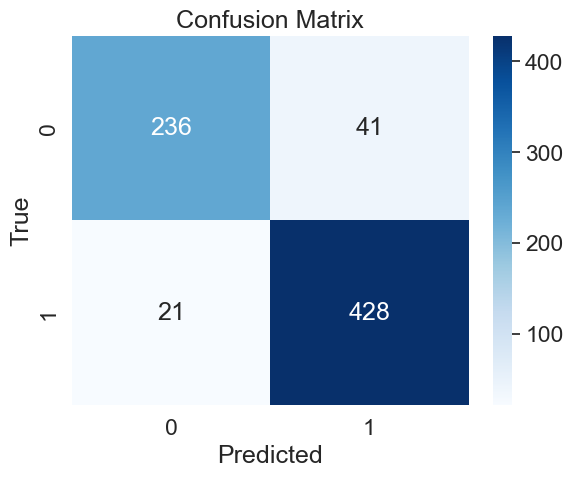

In [51]:
ens2 = VotingClassifier(estimators=[  ('dtree', dtree),
    ('model_nb', model_nb),
    ('lr', lr),
    ('sgd_clf', sgd_clf),
    ('svm', svm),
    ('rfc', rfc),
    ('abc', abc),
    ('xbc', xbc)], voting='hard')
ens2.fit(X_train, y_train)

ens2_pred = ens2.predict(X_test)
perform(ens2_pred)

# With Tuning

Best parameters: {'C': 10, 'penalty': 'l2'}
Precision :  0.9132231404958677
Recall :  0.9132231404958677
Accuracy :  0.9132231404958677
F1 Score :  0.9132231404958677
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

******************************************************



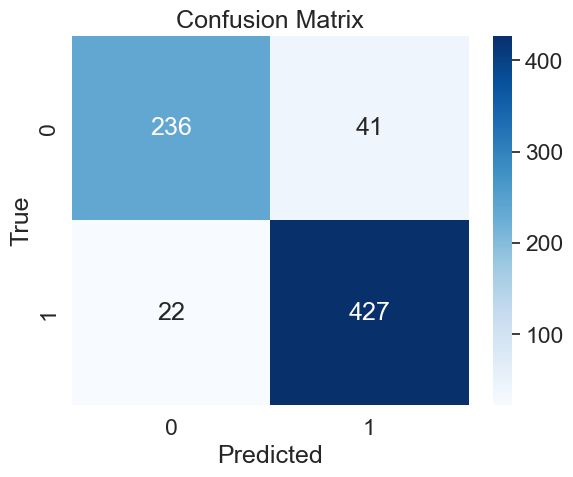

In [ ]:
params = {'C':[0.01, 0.1, 1, 10, 15, 20, 30, 100], 'penalty':['l1', 'l2']}
lr = LogisticRegression(random_state = 42, solver = 'saga', max_iter= 1000)
lr_clf = GridSearchCV(lr, params, cv=5, scoring = 'accuracy')
lr_clf.fit(X_train, y_train)

lrtuned_pred = lr_clf.predict(X_test)


print("Best parameters:", lr_clf.best_params_)
perform(lrtuned_pred)

Best parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Precision :  0.9008264462809917
Recall :  0.9008264462809917
Accuracy :  0.9008264462809917
F1 Score :  0.9008264462809917
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



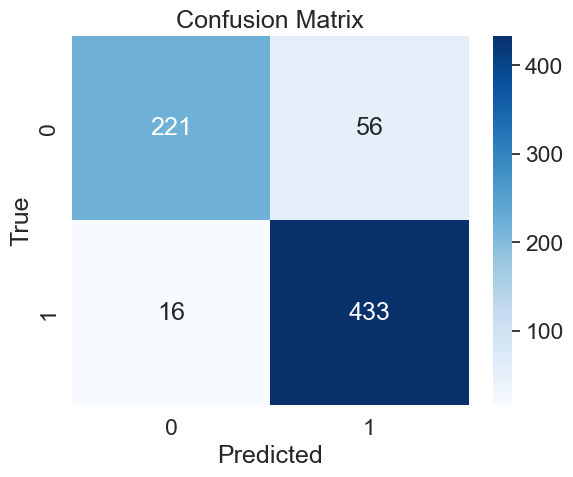

In [56]:
param_grid = {
    'C':[0.1, 1, 10 ,100],
    'kernel' : ['linear', 'rbg', 'poly'],
    'gamma' : ['scale', 'auto', 1, 0.1, 0.01, 0.001]
}

svc = SVC(probability=True)
 
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

best_svc = grid_search.best_estimator_
svc1_pred = best_svc.predict(X_test)

perform(svc1_pred)

## Stacking

Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       277
           1       0.92      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



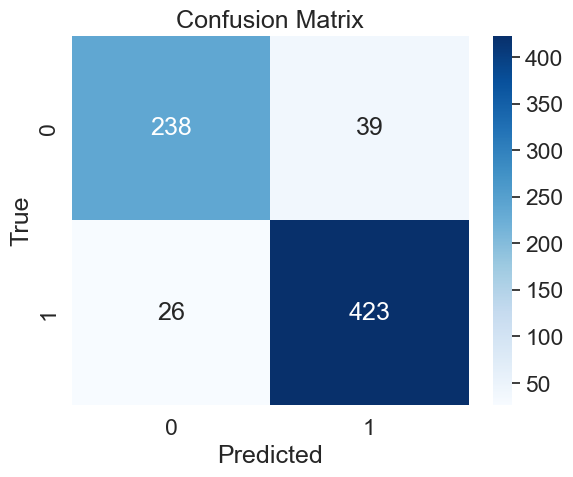

In [ ]:
base_learners = [
    ('dtree', dtree),
    ('model_nb', model_nb),
    ('lr', lr),
    ('sgd_clf', sgd_clf),
    ('svm', svm),
    ('rfc', rfc),
    ('abc', abc),
    ('xbc', xbc)
]

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

stacked_model.fit(X_train, y_train)

stacked_model_pred = stacked_model.predict(X_test)

perform(stacked_model_pred)


In [58]:
base_models = {
    'dtree': dtree,
    'model_nb': model_nb,
    'lr': lr,
    'sgd_clf': sgd_clf,
    'svm': svm,
    'rfc': rfc,
    'abc': abc,
    'xbc': xbc
}

final_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier(), 
]

from itertools import combinations

# Generate all combinations of base models, for example, combinations of 3 models
base_combinations = []
for combo in combinations(base_models.keys(), 3):
    base_combinations.append(combo)

from sklearn.model_selection import cross_val_score

best_score = 0
best_base_learners = None
best_final_estimator = None

for combo in base_combinations:
    base_learners = [(name, base_models[name]) for name in combo]
    for final_estimator in final_estimators:
        stacked_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5, n_jobs=-1)
        scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        
        if mean_score > best_score:
            best_score = mean_score
            best_base_learners = combo
            best_final_estimator = final_estimator

print(f"Best Score: {best_score}")
print(f"Best Base Learners: {best_base_learners}")
print(f"Best Final Estimator: {best_final_estimator.__class__.__name__}")


Best Score: 0.9170116920885512
Best Base Learners: ('lr', 'rfc', 'abc')
Best Final Estimator: LogisticRegression


Precision :  0.9090909090909091
Recall :  0.9090909090909091
Accuracy :  0.9090909090909091
F1 Score :  0.9090909090909091
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       277
           1       0.92      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



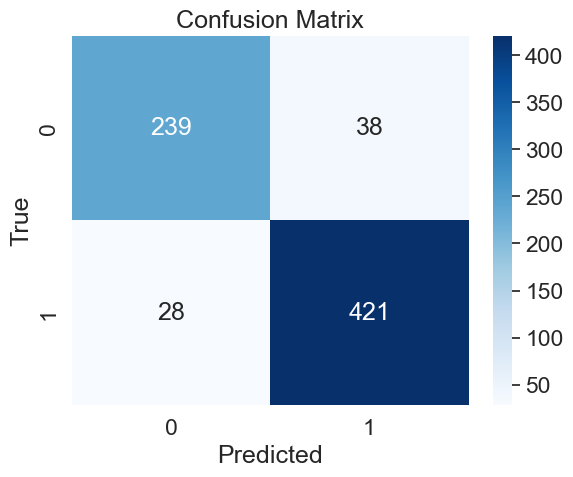

In [60]:
## Hypertuned Stacking
base_learners = [
    ('lr', lr),
    ('rfc', rfc),
    ('abc', abc)
]

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

stacked_model.fit(X_train, y_train)

stacked_model_tuned_pred = stacked_model.predict(X_test)

perform(stacked_model_tuned_pred)


In [83]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation = 'sigmoid')
])
initial_learning_rate = 0.01

lr_schedule = ExponentialDecay(initial_learning_rate = initial_learning_rate, decay_steps = 100, decay_rate = 0.96, staircase = True)
optimizer = tf.optimizers.Adam(learning_rate=lr_schedule)

nn_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)

history = nn_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,  
                    batch_size=64,
                    callbacks=[early_stopping])


Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 0.3432 - accuracy: 0.8616 - val_loss: 0.2791 - val_accuracy: 0.9063
Epoch 2/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2670 - accuracy: 0.8933 - val_loss: 0.2743 - val_accuracy: 0.8926
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2408 - accuracy: 0.9074 - val_loss: 0.2566 - val_accuracy: 0.9022
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2361 - accuracy: 0.9132 - val_loss: 0.2535 - val_accuracy: 0.9063
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.9194 - val_loss: 0.2609 - val_accuracy: 0.9050
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2146 - accuracy: 0.9222 - val_loss: 0.2462 - val_accuracy: 0.9105
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.9194 - val_loss: 0.2809 - val_accuracy: 0.8871
Epoch 8/100


 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 6ms/step
Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287
******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       277
           1       0.90      0.97      0.93       449

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



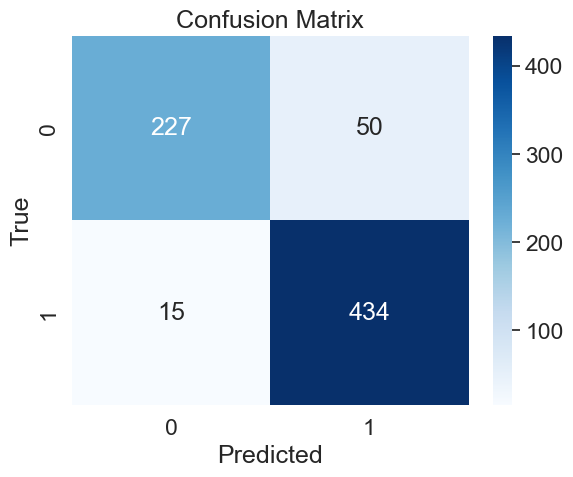

In [102]:
nn_model_pred_probs = nn_model.predict(X_test)
nn_model_pred = (nn_model_pred_probs > 0.5).astype(int)
perform(nn_model_pred)

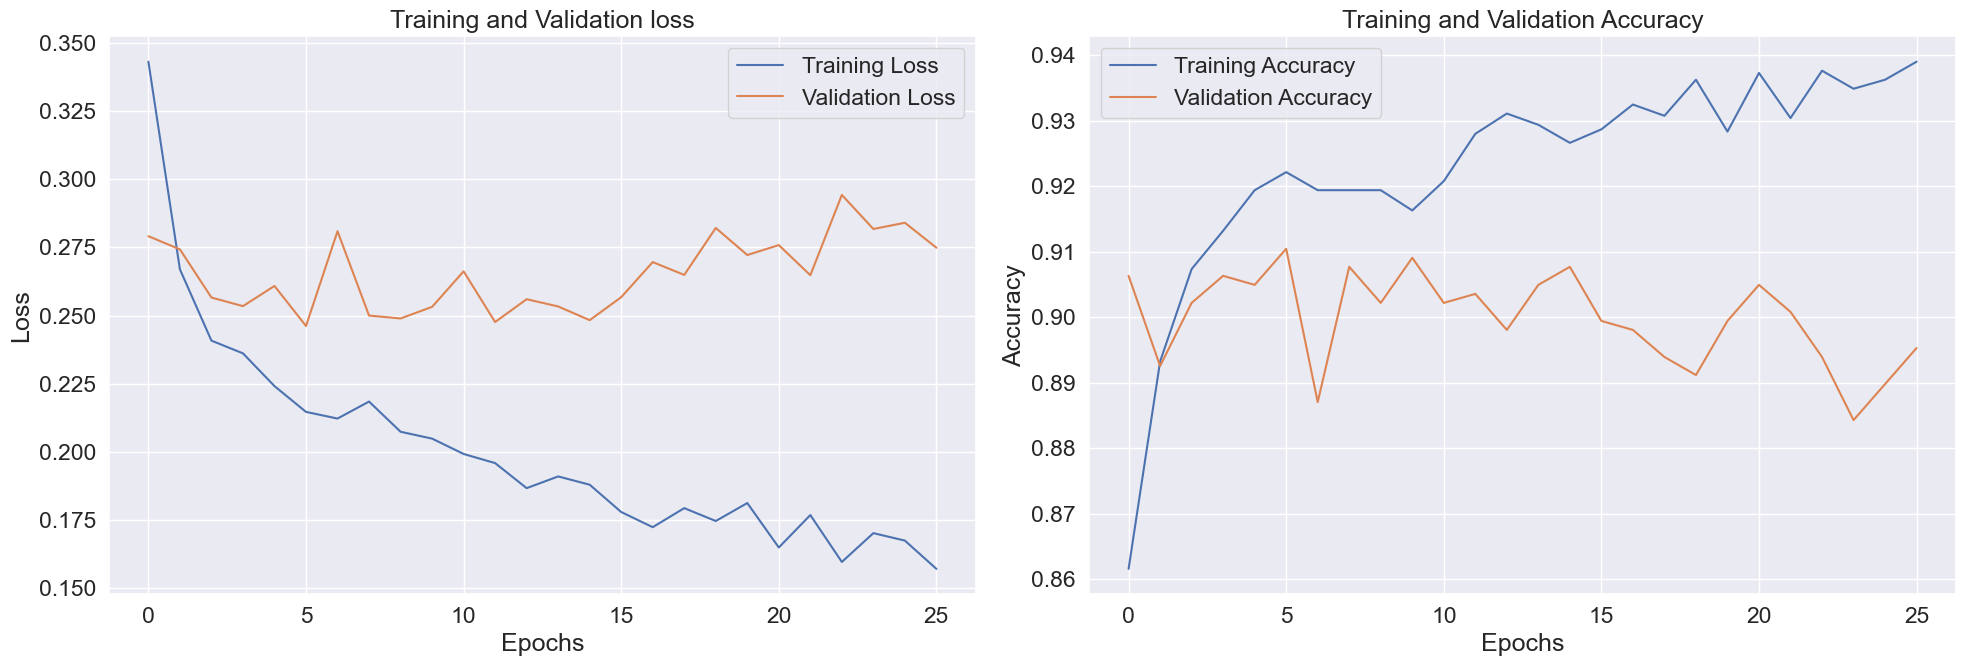

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))

ax1.plot(history.history['loss'], label = 'Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label = 'Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [87]:
nn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                2368      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


NameError: name 'lrtuned_pred' is not defined

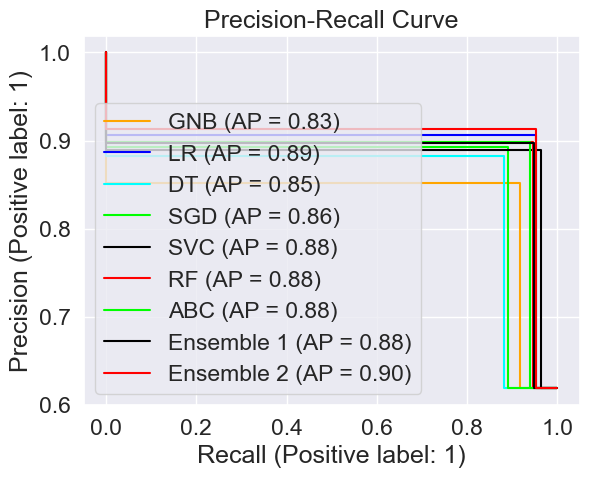

In [105]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, lr_pred, ax = ax, name = "LR", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, dt_pred, ax = ax, name = "DT", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, sgd_pred, ax = ax, name = "SGD", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, svc_pred, ax = ax, name = "SVC", color='black')
PrecisionRecallDisplay.from_predictions(y_test, rf_pred, ax = ax, name = "RF", color='red')
PrecisionRecallDisplay.from_predictions(y_test, abc_pred, ax = ax, name = "ABC", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, ens1_pred, ax = ax, name = "Ensemble 1", color='black')
PrecisionRecallDisplay.from_predictions(y_test, ens2_pred, ax = ax, name = "Ensemble 2", color='red')
PrecisionRecallDisplay.from_predictions(y_test, lrtuned_pred, ax = ax, name = "LR Tuned", color='black')
PrecisionRecallDisplay.from_predictions(y_test, svc1_pred, ax = ax, name = "SVC Tuned", color='red')
PrecisionRecallDisplay.from_predictions(y_test, stacked_model_pred, ax = ax, name = "Stacked Model", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, stacked_model_tuned_pred, ax = ax, name = "Stacked Model Tuned", color='black')
PrecisionRecallDisplay.from_predictions(y_test, nn_model_pred, ax = ax, name = "Neural Network Pred", color='red')

NameError: name 'lrtuned_pred' is not defined

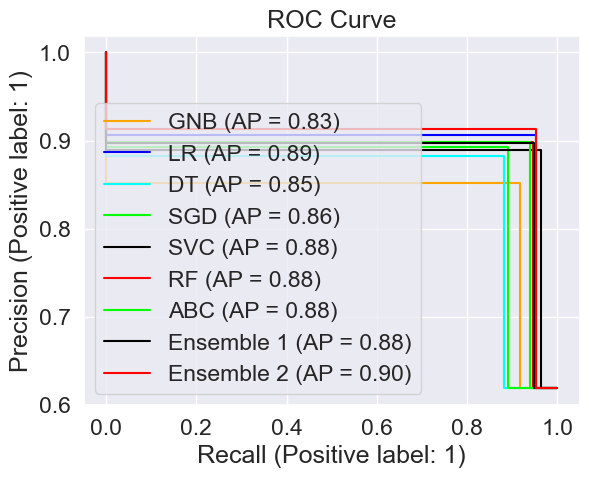

In [103]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, lr_pred, ax = ax, name = "LR", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, dt_pred, ax = ax, name = "DT", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, sgd_pred, ax = ax, name = "SGD", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, svc_pred, ax = ax, name = "SVC", color='black')
PrecisionRecallDisplay.from_predictions(y_test, rf_pred, ax = ax, name = "RF", color='red')
PrecisionRecallDisplay.from_predictions(y_test, abc_pred, ax = ax, name = "ABC", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, ens1_pred, ax = ax, name = "Ensemble 1", color='black')
PrecisionRecallDisplay.from_predictions(y_test, ens2_pred, ax = ax, name = "Ensemble 2", color='red')
PrecisionRecallDisplay.from_predictions(y_test, lrtuned_pred, ax = ax, name = "LR Tuned", color='black')
PrecisionRecallDisplay.from_predictions(y_test, svc1_pred, ax = ax, name = "SVC Tuned", color='red')
PrecisionRecallDisplay.from_predictions(y_test, stacked_model_pred, ax = ax, name = "Stacked Model", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, stacked_model_tuned_pred, ax = ax, name = "Stacked Model Tuned", color='black')
PrecisionRecallDisplay.from_predictions(y_test, nn_model_pred, ax = ax, name = "Neural Network Pred", color='red')